In [14]:
import os
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, roc_curve, f1_score,accuracy_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import xgboost as xgb

/homes/sharm267/anaconda3/envs/pytorch/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
datafile = 'BD-Fifo.dat'

In [16]:
data = np.loadtxt(datafile,dtype=str)

In [17]:
##### data sanity check

# Check number of class labels
print(np.unique(data[:,[99]]))

# Modify the data array
# Change class labels. A : 0, B: 1
# Change the data type for float otherwise
data_n = np.zeros(data.shape,dtype=np.float)
for idx,d in enumerate(data):
    d[-1] = 0 if d[-1] == 'A' else 1
    data_n[idx] = [float(val) for val in d]

['A' 'C']


In [18]:
logit = linear_model.LogisticRegression()

In [19]:
N = len(data_n)
print("N: {}".format(N))
test_n = 5000
val_n = 5000
# Train Set
test_idx = np.random.choice(range(N),test_n,replace=False)
train_idx = [x for x in range(N) if x not in test_idx]
val_idx = np.random.choice(train_idx,val_n,replace=False)
train_idx = [x for x in train_idx if x not in val_idx]
print(type(test_idx))
print(type(train_idx))
print(type(val_idx))

N: 35441
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [20]:
def start_pca_validation():
    prefix_training = "../../../../k_fold_training_set_"
    prefix_test = "../../../../k_fold_test_set_"
    suffix = ".csv"
    file_names = ['1','2','3','4','5']

    C_arr = [4000,4100,4200,4300,4400,4500,4600,4700,4800,4900,5000,6000,7000,8000,9000,10000]

    for c in C_arr:
        f_measure_sum = 0
        count = 0
        for file_name in file_names:
            classifier = get_classifier(c)
            training_file = prefix_training + file_name + suffix
            test_file = prefix_test + file_name + suffix

            indices_train,data_train,labels_train = pca.read_data(training_file)

            X_pc_train = pca.get_principal_components(data_train,10)

            classifier.fit(X_pc_train,labels_train) 

            indices_test,data_test,labels_test = pca.read_data(test_file)

            X_pc_test = pca.get_principal_components(data_test,10)

            y_pred = classifier.predict(X_pc_test)

            [accuracy,error,recall,precision,specificity,f_measure] = get_statistics(labels_test,y_pred)
            
            if f_measure != -1:
                f_measure_sum = f_measure_sum + f_measure
                count = count + 1


        f_measure_sum = f_measure_sum/count

def start_testing_pca():

    indices_train,data_train,labels_train = pca.read_data(TRAINING_SET)

    data_train_pc = pca.get_principal_components(data_train,10)
    classifier = get_classifier(C)
    classifier.fit(data_train_pc,labels_train)

    # read the test data

    indices_test,data_test,labels_test = pca.read_data(TESTING_SET)
    data_test_pc = pca.get_principal_components(data_test,10)

    # Code For ROC curve
    prob_estimates = classifier.predict_proba(data_test_pc)

    fpr, tpr, thresholds = metrics.roc_curve(y_true=labels_test,y_score=prob_estimates[:,1],pos_label=1)

    precision,recall,_ = precision_recall_curve(y_true=labels_test,probas_pred=prob_estimates[:,1],pos_label=1)

    print_roc_data(fpr,tpr)
    print_pr_data(precision,recall,PR_file_logistic_pca_10)    
    y_pred = classifier.predict(data_test_pc)

    [accuracy,error,recall,precision,specificity,f_measure] = get_statistics(labels_test,y_pred)

In [21]:
train_X = data_n[train_idx,:][:,range(99)]
train_Y = data_n[train_idx,:][:,[99]].flatten().astype(np.int)

val_X = data_n[val_idx,:][:,range(99)]
val_Y = data_n[val_idx,:][:,[99]].flatten().astype(np.int)

test_X = data_n[test_idx,:][:,range(99)]
test_Y = data_n[test_idx,:][:,[99]].flatten().astype(np.int)

In [22]:
def plot_roc(algo,true,score):
    roc_score = roc_auc_score(true,score)
    fpr, tpr, _ = roc_curve(true,score)
    plt.plot(fpr,tpr,label='ROC curve (auc = {:0.2f})'.format(roc_score*100),color='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("{}".format(algo))
    plt.legend(loc="lower right")
    plt.savefig("".join(algo.split()))
    plt.show()

In [23]:
def start_testing():
    [X,Y,X_0] = read_data(TRAINING_SET)

    classifier = get_classifier(C)
    classifier.fit(X,Y)

    # read the test data

    [X_test,Y_test,X_0_test] = read_data(TESTING_SET)


    prob_estimates = classifier.predict_proba(X_test)

    # ROC data
    fpr, tpr, thresholds = metrics.roc_curve(y_true=Y_test,y_score=prob_estimates[:,1],pos_label=1)

    # PR data
    precision,recall,_ = precision_recall_curve(y_true=Y_test,probas_pred=prob_estimates[:,1],pos_label=1)

    print_roc_data(fpr,tpr)    
    print_pr_data(precision,recall,PR_file_logistic)    

    y_pred = classifier.predict(X_test)

    [accuracy,error,recall,precision,specificity,f_measure] = get_statistics(Y_test,y_pred)

In [24]:
def start_validation():

    C_arr = [0.001,0.01,0.1,1,10,100,1000,10000]
    prefix_training = "../../../../k_fold_training_set_"
    prefix_test = "../../../../k_fold_test_set_"
    suffix = ".csv"
    file_names = ['1','2','3','4','5']
    for C in C_arr:
        classifier = get_classifier(C)
        f_measure_sum = 0.0
        count = 0
        for file_name in file_names:
            training_file = prefix_training + file_name + suffix
            test_file = prefix_test + file_name + suffix

            [X,Y,X_0] = read_data(training_file)

            classifier.fit(X,Y) 

            [accuracy,error,recall,precision,specificity,f_measure] = get_validation_statistics(classifier,test_file)
            
            if f_measure != -1:
                f_measure_sum = f_measure_sum + f_measure
                count = count + 1


        f_measure_sum = f_measure_sum/count

In [25]:
def get_statistics(y_true,y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for (u,v) in zip(y_true,y_pred):
        if u == 1 and v == 1:
            tp += 1
        if u == 0 and v == 1:
            fp += 1
        if u == 1 and v == 0:
            fn += 1
        if u == 0 and v == 0:
            tn += 1

    total_samples = fn + tn + fp + tp

    try:
        accuracy = (tp + tn)*1.0/total_samples
    except:
        accuracy = -1

    try:
        error = (fp+fn)*1.0/total_samples
    except:
        error = -1

    try:
        recall = tp*1.0/(tp+fn)
    except:
        recall = -1

    try:
        precision = tp*1.0/(tp+fp)
    except:
        precision = -1

    try:
        specificity = tn*1.0/(tn+fp)
    except:
        specificity = -1
    try:
        f_measure = 2*recall*precision/(precision+recall)
    except:
        f_measure = -1

    return [accuracy,error,recall,precision,specificity,f_measure]

### Logistic Regression

In [26]:
logit.fit(val_X,val_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
pos_score = logit.predict_proba(test_X)[:,[1]]

/homes/sharm267/anaconda3/envs/pytorch/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


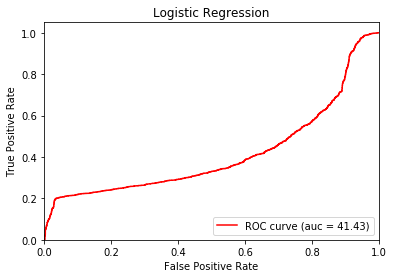

In [28]:
plot_roc("Logistic Regression",test_Y,pos_score)

### Bagging

In [29]:
# Bagging Classifier
bagging = BaggingClassifier(n_estimators=30)

In [ ]:
bagging.fit(train_X,train_Y)

In [ ]:
pos_score = bagging.predict_proba(test_X)[:,[1]]
pred_y = bagging.predict(test_X)
f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))
roc_auc_score(test_Y,pos_score)

In [ ]:
plot_roc("Bagging",test_Y,pos_score)

### Random Forest

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=30)
rand_forest.fit(train_X,train_Y)

In [ ]:
pos_score = rand_forest.predict_proba(test_X)[:,[1]]


In [ ]:
plot_roc("Random Forest",test_Y,pos_score)

In [ ]:
pred_y = rand_forest.predict(test_X)
f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))

### Decision Tree

In [ ]:
min_sample_split = range(402,503,10)
for m in min_sample_split:
    
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=m)
    clf.fit(train_X,train_Y)
    prob_scores = clf.predict_proba(test_X)[:,[1]]
    auc = roc_auc_score(test_Y,prob_scores)
    print("m: {} auc:{}".format(m,auc))

In [ ]:
clf = DecisionTreeClassifier(random_state=0,min_samples_split=402)
clf.fit(train_X,train_Y)
prob_scores = clf.predict_proba(test_X)[:,[1]]

In [ ]:
plot_roc("Decision Tree",test_Y,prob_scores)

In [ ]:
pred_y = clf.predict(test_X)
f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))

### Extra Tree Ensamble

In [ ]:
clf = ExtraTreesClassifier(n_estimators=30)
clf.fit(train_X,train_Y)
prob_scores = clf.predict_proba(test_X)[:,[1]]
plot_roc("Extra Tree",test_Y,prob_scores)

In [ ]:
pred_y = clf.predict(test_X)
f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))

## Nearest Neighbors

In [ ]:
n_trees = range(5,11)
for n in n_trees:
    cls = NearestNeighbors(n_neighbors=n)
    cls.fit(train_X,train_Y)
    prob_scores = clf.predict_proba(test_X)[:,[1]]
    auc = roc_auc_score(test_Y,prob_scores)
    print("m: {} auc:{}".format(n,auc))

In [ ]:
clf = NearestNeighbors(n_neighbors=8)
clf.fit(train_X,train_Y)
prob_scores = clf.predict_proba(test_X)[:,[1]]
plot_roc("8-NN",test_Y,prob_scores)

### XG Boost

In [ ]:
dtest = xgb.DMatrix(test_X, label=test_Y)
for d in range(5,20):
    
    param = {'max_depth':d, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
    dtrain = xgb.DMatrix(train_X, label=train_Y)
    bst = xgb.train(param, dtrain, 2)
    prob = bst.predict(dtest)
    auc = roc_auc_score(test_Y,prob)
    print("d: {} auc:{}".format(d,auc))

In [ ]:
dtest = xgb.DMatrix(test_X, label=test_Y)
param = {'max_depth':d, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
dtrain = xgb.DMatrix(train_X, label=train_Y)
bst = xgb.train(param, dtrain, 2)
prob = bst.predict(dtest)
plot_roc("xgboost",test_Y,prob)

In [ ]:
pred_y = bst.predict(dtest)
pred_y = [round(value) for value in pred_y]

f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))

### Boosting

In [ ]:
cls = GradientBoostingClassifier()
cls.fit(train_X,train_Y)
proba = cls.predict_proba(test_X)[:,[1]]
plot_roc("Boosting",test_Y,proba)

In [ ]:
pred_y = clf.predict(test_X)
f1 = f1_score(test_Y,pred_y)
error = 1 - accuracy_score(test_Y,pred_y)
print("F1: {}".format(f1*100))
print("Error: {} ".format(error*100))